# Explore here

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install xgboost
!pip install statsmodels
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 56.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 51.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.8/346.8 kB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.9/507.9 kB 70.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 69.0 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 72.4 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 69.9 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32

In [2]:

import pandas as pd
import numpy as np
from numpy.random import seed, choice
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier 
from imblearn.metrics import specificity_score
from sklearn.model_selection import GridSearchCV
import joblib

In [3]:
# Cargamos lsos datos
url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
df =pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Comprobamos tamaño del dataframe
df.shape

(768, 9)

In [5]:
#Comprobamos tipos de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Comprobamos duplicados
df.duplicated().sum()

np.int64(0)

In [7]:
# Comprobamos valores nulos
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# Comprobamos valores únicos
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [9]:
# Detectamos valores incompatibles con la vida
# En este dataset, variables como Glucose, BloodPressure, SkinThickness, Insulin y BMI no pueden ser 0
var_incomp = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for var in var_incomp:
    incompatible_count = (df[var] == 0).sum()
    if incompatible_count > 0:
        print(f"{var} tiene {incompatible_count} valores de 0, lo cual es incompatible con la vida.")

Glucose tiene 5 valores de 0, lo cual es incompatible con la vida.
BloodPressure tiene 35 valores de 0, lo cual es incompatible con la vida.
SkinThickness tiene 227 valores de 0, lo cual es incompatible con la vida.
Insulin tiene 374 valores de 0, lo cual es incompatible con la vida.
BMI tiene 11 valores de 0, lo cual es incompatible con la vida.


In [10]:
# Reemplazamos de valores 0 con NaN para su imputación
for var in var_incomp:
    df[var] = df[var].replace(0, np.nan)

# Verificamos cuántos NaN tenemos ahora
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [11]:
# ELiminamos la variable insulina al tener un alto número de valores nulos
df.drop('Insulin', axis = 1, inplace= True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,8,183.0,64.0,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,43.1,2.288,33,1


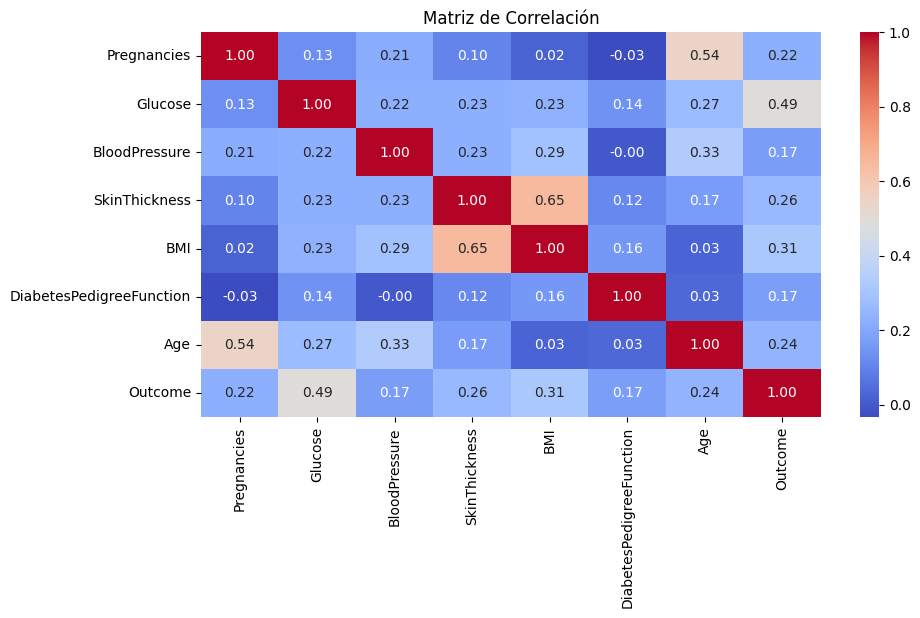

In [12]:
# Matriz de Correlación
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

De la gráfica anterior observamos lo siguiente:

La edad está muy relacionada con el número de embarazos (pregnancies)
La glucosa está muy relacionada con el resultado
El BMI está muy relacionadO con el grosor de la piel (skinthickness)

In [13]:
# Partición de los datos
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Selección de características importantes con XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

importancias = xgb_model.feature_importances_
importancias_df = pd.DataFrame({"Feature": X_train.columns, "Importance": importancias})
importancias_df = importancias_df[importancias_df["Importance"] > 0.01]  # Mayor al 1%

print("Características seleccionadas:")
print(importancias_df)

Características seleccionadas:
                    Feature  Importance
0               Pregnancies    0.095326
1                   Glucose    0.267820
2             BloodPressure    0.099839
3             SkinThickness    0.110050
4                       BMI    0.158138
5  DiabetesPedigreeFunction    0.107625
6                       Age    0.161201


In [15]:
#  Entrenar un Modelo Inicial de XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Instanciar el modelo con valores por defecto
xgb = XGBClassifier(eval_metric="logloss", random_state=42)

# Entrenar el modelo
xgb.fit(X_train, y_train)

# Hacer predicciones
y_pred_xgb = xgb.predict(X_test)

# Evaluar el modelo
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Precisión de XGBoost (sin optimizar): {acc_xgb:.4f}")

Precisión de XGBoost (sin optimizar): 0.7143


In [16]:
# Optimización de Hiperparámetros con Grid Search
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a ajustar
param_grid_xgb = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 10]
}

# Aplicar Grid Search con validación cruzada
grid_search_xgb = GridSearchCV(XGBClassifier(eval_metric="logloss", random_state=42),
                               param_grid_xgb, cv=5, scoring="accuracy")
# Eliminamos use_label_encoded por evitar warnings

grid_search_xgb.fit(X_train, y_train)

# Mejor modelo encontrado
best_xgb = grid_search_xgb.best_estimator_

# Predicción con el mejor modelo
y_pred_best_xgb = best_xgb.predict(X_test)
acc_best_xgb = accuracy_score(y_test, y_pred_best_xgb)

print(f"Mejor configuración encontrada: {grid_search_xgb.best_params_}")
print(f"Precisión optimizada de XGBoost: {acc_best_xgb:.4f}")

Mejor configuración encontrada: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Precisión optimizada de XGBoost: 0.7597


Análisis de Resultados
1. Tasa de aprendizaje (learning_rate = 0.1)
----- Un valor bajo permite que el modelo aprenda de forma más gradual, evitando sobreajuste.

2. Profundidad máxima (max_depth = 3)
---- Un valor bajo sugiere que el modelo prioriza generalización sobre ajuste a los datos de entrenamiento.
---- max_depth grande suele llevar a overfitting, por lo que 3 parece adecuado.

3. Número de árboles (n_estimators = 50)
---- Se ha elegido un número bajo de árboles, lo cual reducir el tiempo de ejecución.

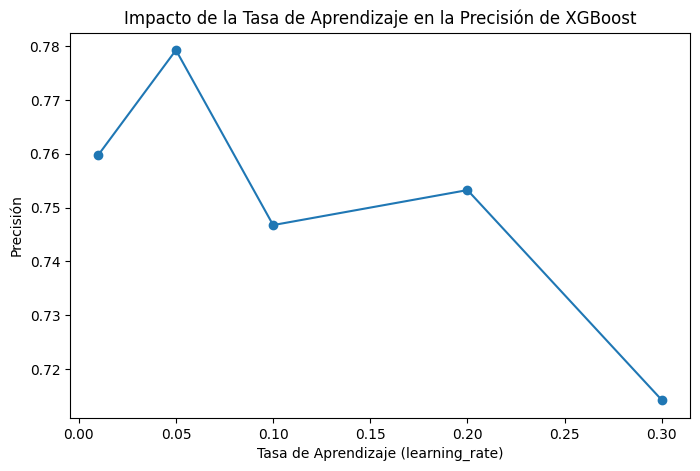

In [17]:
# Análisis del Impacto de los Hiperparámetros
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3]
accuracy_scores = []

for lr in learning_rates:
    xgb_model = XGBClassifier(n_estimators=100, learning_rate=lr, eval_metric="logloss", random_state=42)
    # Eliminamos use_label_encoded por evitar warnings
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    acc_xgb = accuracy_score(y_test, y_pred_xgb)
    accuracy_scores.append(acc_xgb)

# Graficar resultados
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, accuracy_scores, marker='o', linestyle='-')
plt.xlabel("Tasa de Aprendizaje (learning_rate)")
plt.ylabel("Precisión")
plt.title("Impacto de la Tasa de Aprendizaje en la Precisión de XGBoost")
plt.show()

De la grafica anterior vemos lo siguiente:

- Punto óptimo: La mejor precisión se alcanza con una tasa de aprendizaje de 0.05, lo que indica que un learning_rate bajo permite un entrenamiento más efectivo.

Tasas mayores de 0.20 comienzan a reducir la precisión, lo que sugiere un posible sobreajuste.

In [18]:
# Guardar el Modelo Optimizado
import joblib

# Guardar el modelo entrenado
joblib.dump(best_xgb, "xgboost_diabetes.pkl")
print("Modelo XGBoost guardado correctamente.")

Modelo XGBoost guardado correctamente.
